# Noise vs Object

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import cv2
import logging
import matplotlib.pyplot as plt
import numpy as np
import random
import json

import seaborn; seaborn.set_style('whitegrid')
np.set_printoptions(precision=1)

## Naive Bayes

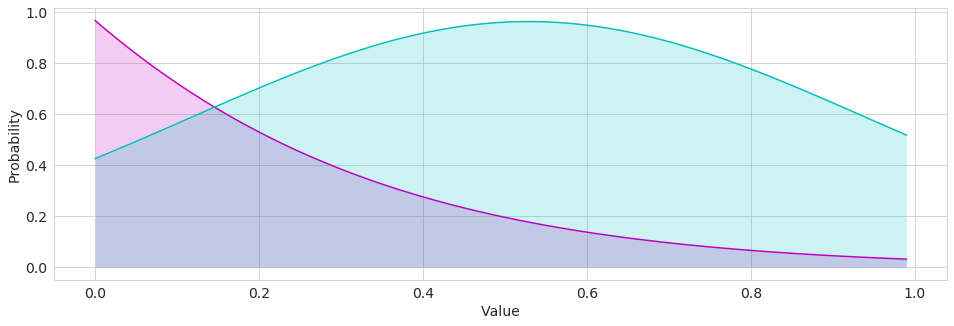

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
from scipy.stats import skewnorm, norm, expon

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

x0=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
x1=[0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
x2=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]


y0=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y1=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.70 ,0.65 ,0.65 ,0.65 ,0.65 ,0.65 ,0.65 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y2=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y3=[0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y4=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.60 ,0.60 ,0.60 ,0.60 ,0.60 ,0.60 ,0.60 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y5=[0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]
y6=[0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.05 ,0.10 ,0.15 ,0.20 ,0.25 ,0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 ,0.60 ,0.65 ,0.70 ,0.75 ,0.80 ,0.85 ,0.90 ,0.95 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.90 ,0.85 ,0.80 ,0.75 ,0.70 ,0.65 ,0.60 ,0.55 ,0.50 ,0.45 ,0.40 ,0.35 ,0.30 ,0.25 ,0.20 ,0.15 ,0.10 ,0.05 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ,0.00 ]

X=x0+x1+x2
Y=y0+y1+y2+y3+y4+y5+y6

d1 = PoissonDistribution.from_samples(X)
d2 = NormalDistribution.from_samples(Y)
idxs = numpy.arange(0, 1, 0.01)

p1 = list(map(d1.probability, idxs))
p2 = list(map(d2.probability, idxs))

plt.figure(figsize=(16, 5))
plt.plot(idxs, p1, color='m'); plt.fill_between(idxs, 0, p1, facecolor='m', alpha=0.2)
plt.plot(idxs, p2, color='c'); plt.fill_between(idxs, 0, p2, facecolor='c', alpha=0.2)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

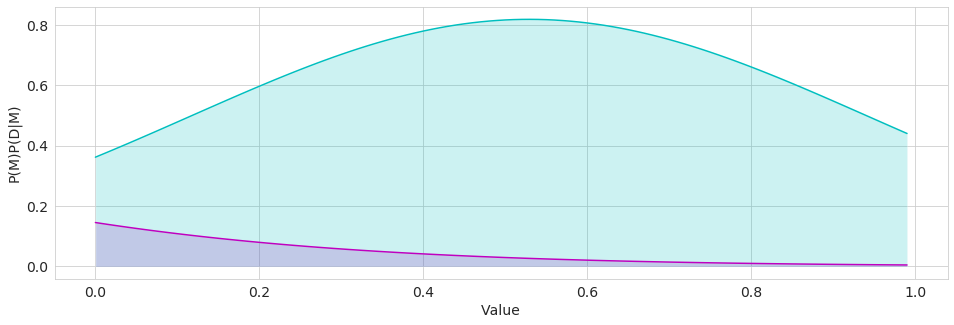

In [16]:
magenta_prior = 1. * len(X) / len(X+Y)
cyan_prior = 1. * len(Y) / len(X+Y)

d1 = PoissonDistribution.from_samples(X)
d2 = NormalDistribution.from_samples(Y)
idxs = numpy.arange(0, 1, 0.01)

p_magenta = numpy.array(list(map(d1.probability, idxs))) * magenta_prior
p_cyan = numpy.array(list(map(d2.probability, idxs))) * cyan_prior

plt.figure(figsize=(16, 5))
plt.plot(idxs, p_magenta, color='m'); plt.fill_between(idxs, 0, p_magenta, facecolor='m', alpha=0.2)
plt.plot(idxs, p_cyan, color='c'); plt.fill_between(idxs, 0, p_cyan, facecolor='c', alpha=0.2)
plt.xlabel("Value", fontsize=14)
plt.ylabel("P(M)P(D|M)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


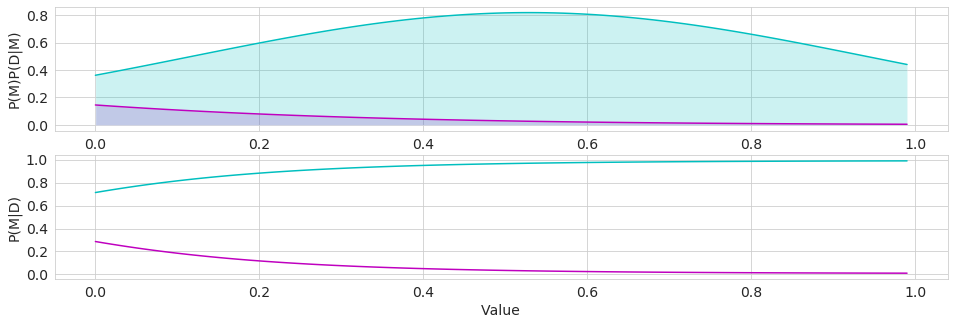

In [17]:
magenta_posterior = p_magenta / (p_magenta + p_cyan)
cyan_posterior = p_cyan / (p_magenta + p_cyan)

plt.figure(figsize=(16, 5))
plt.subplot(211)
plt.plot(idxs, p_magenta, color='m'); plt.fill_between(idxs, 0, p_magenta, facecolor='m', alpha=0.2)
plt.plot(idxs, p_cyan, color='c'); plt.fill_between(idxs, 0, p_cyan, facecolor='c', alpha=0.2)
plt.xlabel("Value", fontsize=14)
plt.ylabel("P(M)P(D|M)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(212)
plt.plot(idxs, magenta_posterior, color='m')
plt.plot(idxs, cyan_posterior, color='c')
plt.xlabel("Value", fontsize=14)
plt.ylabel("P(M|D)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from pomegranate import *
import numpy as np


def modelparam1():
    dists = [
        DiscreteDistribution({'0': 0.9, '1': 0.1}),
        DiscreteDistribution({'0': 0.9, '1': 0.1}),
        DiscreteDistribution({'0': 0.9, '1': 0.1}),
        DiscreteDistribution({'0': 0.8, '1': 0.2}),
        DiscreteDistribution({'0': 0.9, '1': 0.1}),
    ]
    transmat = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                         [0.0, 0.8, 0.2, 0.0, 0.0],
                         [0.0, 0.1, 0.0, 0.9, 0.0],
                         [0.0, 0.0, 0.0, 0.8, 0.2],
                         [0.0, 0.9, 0.1, 0.0, 0.0]
                         ])
    startprob = np.array([0.1, 0.4, 0.1, 0.4, 0.1])
    endprob = np.array([0.0, 0.4, 0.1, 0.4, 0.1])
    statename = 'UAEPL'

    return dists, transmat, startprob, endprob, statename


def modelparam2():
    dists = [
        NormalDistribution(0.5, 1),
        NormalDistribution(0.5, 1),
    ]
    transmat = np.array([
        [0.5, 0.5],
        [0.5, 0.5]
    ])
    startprob = np.array([1.0, 0.0])
    endprob = np.array([1.0, 0.0])
    statename = '01'

    return dists, transmat, startprob, endprob, statename


dists, transmat, startprob, endprob, statename = modelparam2()

model = HiddenMarkovModel.from_matrix(transmat, dists, startprob, endprob)

model.bake()

with open('hmm.json', 'w+') as fd:
    fd.write(model.to_json())

with open('hmmtest-act3.txt') as fd:
    seqs = fd.readline().strip()
    nwin = 2
    for i in range(len(seqs) - nwin):
        # seq=np.array(list(map(lambda x : int(x), seqs[i:i+nwin])))
        nwin = min(nwin + 1, 40)
        seq = np.array(list(seqs[i:i + nwin]))
        pred = model.predict(seq)

        print("sequence: {}".format(''.join(seq)))
        print(f"hmm pred: {''.join(list(map(lambda x: statename[x], pred)))}")
        print(f"log prob: {model.log_probability(seq):.2f}")
